In [1]:
# Import numpy and matplot.lib

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define Constants and Discretize the System
L = 1.0  
N = 2000  
x = np.linspace(-L / 2, L / 2, N)
dx = L / N  

In [3]:
# Create the Laplacian matrix
def Laplacian_Matrix(N, dx):

# Create Laplacian matrix by using np.ones
    diagonal = -2 * np.ones(N) # Diagonal value = -2
    off_diagonal = np.ones(N-1) # Off-diagonal value = 1
    
# Laplacian Matrix = diagonal + up-off-diagonal + down-off-diagonal
    laplacian = (1/dx**2)*(np.diag(diagonal, k=0) + np.diag(off_diagonal, k=1) + np.diag(off_diagonal, k=-1))
    
    return laplacian

laplacian = Laplacian_Matrix(N, dx)


In [4]:
def Hamiltonian_Matrix(laplacian):
    return -0.5 * laplacian # Simplified by using atomic units

hamiltonian = Hamiltonian_Matrix(laplacian)

print(" Hamiltonian Matrix:")
print(hamiltonian)

 Hamiltonian Matrix:
[[ 4000000. -2000000.       -0. ...       -0.       -0.       -0.]
 [-2000000.  4000000. -2000000. ...       -0.       -0.       -0.]
 [      -0. -2000000.  4000000. ...       -0.       -0.       -0.]
 ...
 [      -0.       -0.       -0. ...  4000000. -2000000.       -0.]
 [      -0.       -0.       -0. ... -2000000.  4000000. -2000000.]
 [      -0.       -0.       -0. ...       -0. -2000000.  4000000.]]


In [5]:
# Compute the eigenvalues (energy levels) and eigenfunctions of the Hamiltonian by np.linalg.eig

eigenvalues, eigenvectors = np.linalg.eigh(hamiltonian)

print("Eigenvalues:",eigenvalues)
print("Eigenvectors:",eigenvectors)

Eigenvalues: [4.92987008e+00 1.97194682e+01 4.43687578e+01 ... 7.99995563e+06
 7.99998028e+06 7.99999507e+06]
Eigenvectors: [[-4.96356895e-05 -9.92712567e-05  1.48906579e-04 ... -1.48906579e-04
  -9.92712567e-05  4.96356895e-05]
 [-9.92712567e-05 -1.98541535e-04  2.97809855e-04 ...  2.97809855e-04
   1.98541535e-04 -9.92712567e-05]
 [-1.48906579e-04 -2.97809855e-04  4.46706524e-04 ... -4.46706524e-04
  -2.97809855e-04  1.48906579e-04]
 ...
 [-1.48906579e-04  2.97809855e-04  4.46706524e-04 ...  4.46706524e-04
  -2.97809855e-04 -1.48906579e-04]
 [-9.92712567e-05  1.98541535e-04  2.97809855e-04 ... -2.97809855e-04
   1.98541535e-04  9.92712567e-05]
 [-4.96356895e-05  9.92712567e-05  1.48906579e-04 ...  1.48906579e-04
  -9.92712567e-05 -4.96356895e-05]]


In [6]:
# Sort the eigenvalues in increasing order

sort = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sort]


In [7]:
# Extract the first seven energy levels

eigenvalues = eigenvalues[:7]
print("The first seven energy levels:",eigenvalues)

The first seven energy levels: [  4.92987008  19.71946819  44.36875785  78.87767831 123.24614452
 177.4740471  241.56125239]


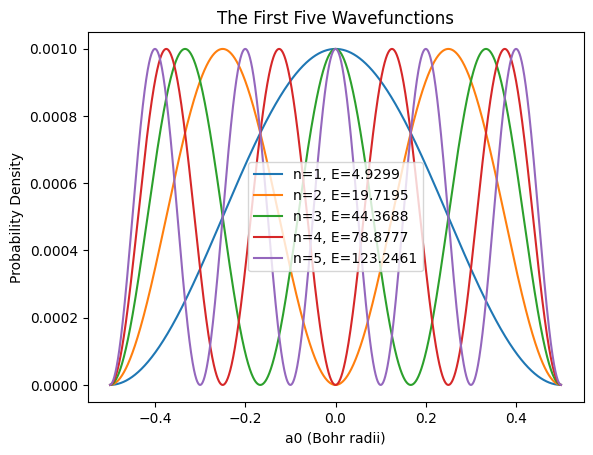

In [8]:
# Plot the first five wavefunctions

for i in range(5):
    plt.plot(x, eigenvectors[:, i]**2, label=f'n={i+1}, E={eigenvalues[i]:.4f}')

plt.xlabel('a0 (Bohr radii)')
plt.ylabel('Probability Density')
plt.title('The First Five Wavefunctions')
plt.legend()
plt.show()
